In [1]:
!pip install ipython-sql

Defaulting to user installation because normal site-packages is not writeable


In [45]:
import pandas as pd
import sqlite3
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [166]:
#Load all files, PreApplicant scores:
preApp_A = pd.read_csv("Files/Reformated data/PreapplicationLmod.csv")

#First semester scores:
#Semst_A = pd.read_csv("Files/Reformated data/Sesmester 1_A (Formated).csv")
preApp_A.columns

Index(['Student Number', 'Combined Score', 'Physics Score', 'Clinical Score',
       'Dexterity Score', 'Persistence Score', 'Problem Solving Score',
       'Graphs Score', 'Judgement Score', 'Spatial Score',
       'Visualization Score', 'Logic Score', 'Final Grade'],
      dtype='object')

In [167]:
preApp_A = preApp_A.dropna()
#preApp_A = preApp_A.drop([1,3,10])
preApp_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student Number         25 non-null     int64  
 1   Combined Score         25 non-null     float64
 2   Physics Score          25 non-null     float64
 3   Clinical Score         25 non-null     float64
 4   Dexterity Score        25 non-null     float64
 5   Persistence Score      25 non-null     float64
 6   Problem Solving Score  25 non-null     float64
 7   Graphs Score           25 non-null     float64
 8   Judgement Score        25 non-null     float64
 9   Spatial Score          25 non-null     float64
 10  Visualization Score    25 non-null     float64
 11  Logic Score            25 non-null     float64
 12  Final Grade            25 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 2.7 KB


In [168]:
#Semst_A
preApp_A
#preApp_A['Final Grade'] = pd.to_numeric(preApp_A['Final Grade'])
training_set, test_set = train_test_split(preApp_A, test_size=0.1)
print(training_set.shape)
print(test_set.shape)

test_set


(22, 13)
(3, 13)


,Student Number,Combined Score,Physics Score,Clinical Score,Dexterity Score,Persistence Score,Problem Solving Score,Graphs Score,Judgement Score,Spatial Score,Visualization Score,Logic Score,Final Grade
18,27,10.45,4.70,5.76,0.75,1.54,1.17,1.71,0.97,1.48,1.86,0.93,81.0077
22,32,4.05,-6.69,10.74,1.04,2.17,1.17,1.03,0.97,1.19,2.87,0.40,88.1860
7,15,10.66,9.00,1.66,1.08,1.15,1.95,1.03,0.78,1.19,1.15,1.06,84.0000


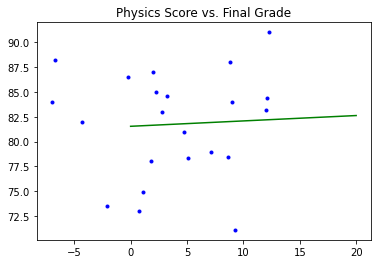

In [160]:
#Making the model
model = LinearRegression()
model.fit(training_set[["Physics Score"]], training_set['Final Grade'])
# print(model.coef_) # beta_1
# print(model.intercept_) # beta_0
m = model.coef_   # slope
b = model.intercept_ # y-intercept

plt.plot(training_set["Physics Score"], training_set['Final Grade'], 'b.')
plt.title("Physics Score vs. Final Grade")
x_coordinates = np.array([0,20])
y_coordinates = x_coordinates * m + b
plt.plot(x_coordinates, y_coordinates, 'g-')

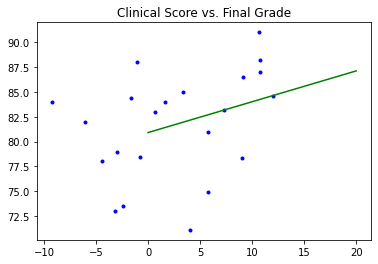

In [161]:
#Making the model
model = LinearRegression()
model.fit(training_set[["Clinical Score"]], training_set['Final Grade'])
# print(model.coef_) # beta_1
# print(model.intercept_) # beta_0
m = model.coef_   # slope
b = model.intercept_ # y-intercept

plt.plot(training_set["Clinical Score"], training_set['Final Grade'], 'b.')
plt.title("Clinical Score vs. Final Grade")
x_coordinates = np.array([0,20])
y_coordinates = x_coordinates * m + b
plt.plot(x_coordinates, y_coordinates, 'g-')

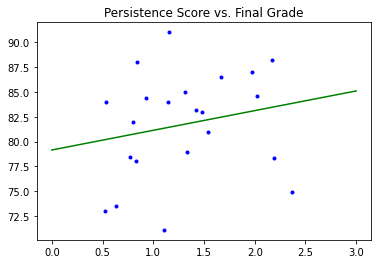

In [157]:
#Making the model
model = LinearRegression()
model.fit(training_set[["Persistence Score"]], training_set['Final Grade'])
# print(model.coef_) # beta_1
# print(model.intercept_) # beta_0
m = model.coef_   # slope
b = model.intercept_ # y-intercept

plt.plot(training_set["Persistence Score"], training_set['Final Grade'], 'b.')
plt.title("Persistence Score vs. Final Grade")
x_coordinates = np.array([0,3])
y_coordinates = x_coordinates * m + b
plt.plot(x_coordinates, y_coordinates, 'g-')

[1.27448]
80.20518988603989


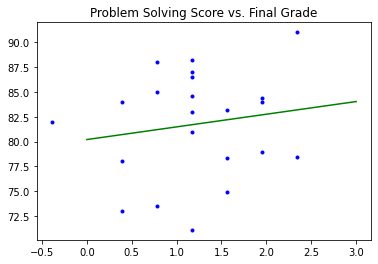

In [163]:
#Making the model
model = LinearRegression()
model.fit(training_set[["Problem Solving Score"]], training_set['Final Grade'])
print(model.coef_) # beta_1
print(model.intercept_) # beta_0
m = model.coef_   # slope
b = model.intercept_ # y-intercept

plt.plot(training_set["Problem Solving Score"], training_set['Final Grade'], 'b.')
plt.title("Problem Solving Score vs. Final Grade")
x_coordinates = np.array([0,3])
y_coordinates = x_coordinates * m + b
plt.plot(x_coordinates, y_coordinates, 'g-')

[-0.13885]
83.63198647722524
[0.21015]
79.925263305077
[0.27843]
80.1040325060111
[0.30339]
80.46993380521468
[9.32106]
72.19757993171676
[1.10445]
79.70002386405626
[1.45629]
79.46893704735376
[2.74501]
77.09551232945029
[-0.75872]
81.85447134997315
[4.21167]
76.29886458143241
[-0.30694]
81.51767352653548
[9.96825]
70.32648225505179
[1.00000]
1.4210854715202004e-14


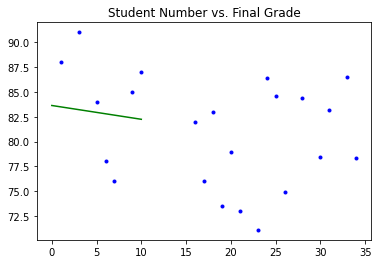

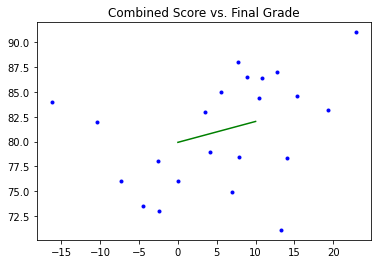

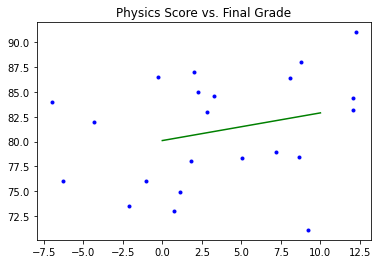

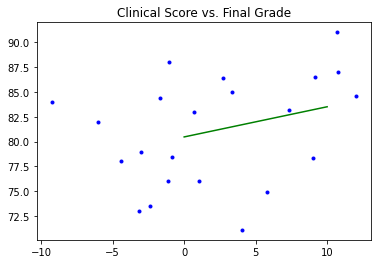

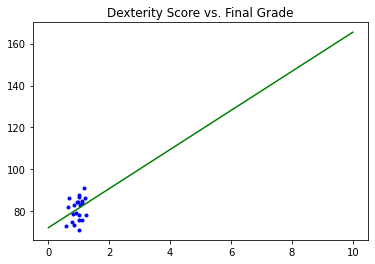

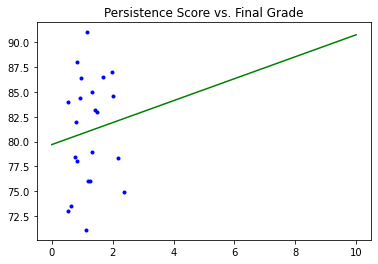

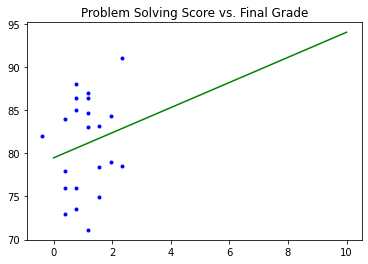

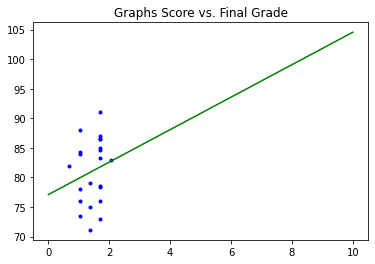

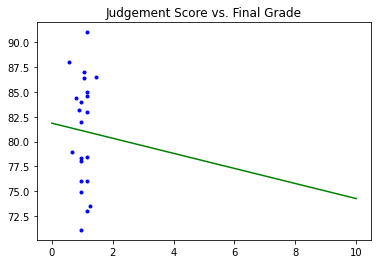

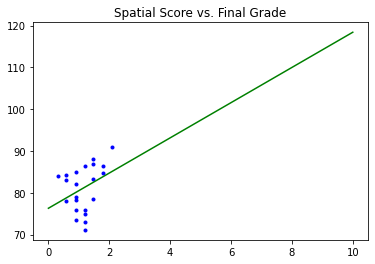

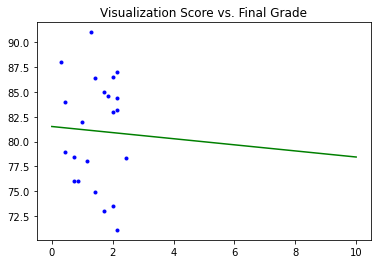

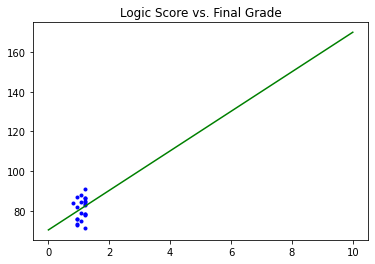

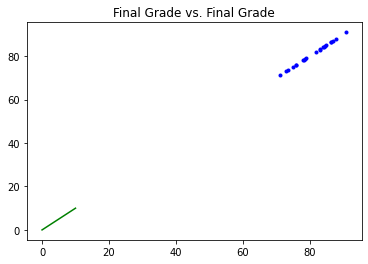

In [184]:
#Making the model
for i in training_set.columns: 
    model = LinearRegression()
    model.fit(training_set[[i]], training_set['Final Grade'])
    print(model.coef_) # beta_1
    print(model.intercept_) # beta_0
    m = model.coef_   # slope
    b = model.intercept_ # y-intercept

    plt.figure()
    plt.plot(training_set[i], training_set['Final Grade'], 'b.')
    plt.title(i + " vs. Final Grade")
    x_coordinates = np.array([0,10])
    y_coordinates = x_coordinates * m + b
    plt.plot(x_coordinates, y_coordinates, 'g-')
    plt.savefig(i + " vs. Final Grade.png")

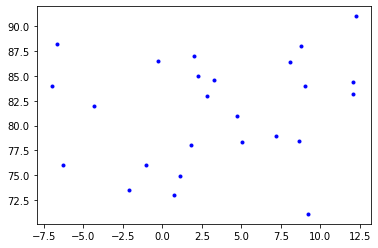

In [111]:
m = model.coef_[0]
n = model.coef_[1]

plt.plot(preApp_A['Physics Score'], preApp_A['Final Grade'], 'b.')
plt.show()

In [108]:
#Cost function, measuring the model's efficiency
from sklearn.metrics import mean_squared_error
input_cols = ["Physics Score", "Clinical Score"]
y_pred = model.predict(training_set[input_cols])
training_MSE = mean_squared_error(training_set['Final Grade'], y_pred)
print("MSE on the training set:", training_MSE)

MSE on the training set: 25.409376548705573


array([80.37496])

In [86]:
# The MSE of model2 on the test set
y_pred = model.predict(test_set[input_cols])
test_MSE = mean_squared_error(test_set['Final Grade'], y_pred)
print("MSE on the training set:", test_MSE)

MSE on the training set: 32.07503393302071


In [79]:
# Construct matrix X using np.hstack(), np.ones()
N = len(training_set) # N = training_set.shape[0]
col1 = np.ones([N, 1])
# print(col1)
col23 = training_set[["Physics Score", "Clinical Score"]].values
# print(col234)
X = np.hstack([col1, col23])
# Construct vector y
y = training_set[['Final Grade']].values

# Apply the normal equation to find theta
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)})
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

array([[81.26290],
       [0.10211],
       [0.35481]])

In [54]:
##Clean preapp:

toDel = ['Dexterity Score','Graphs Score', 'Spatial Score',
       'Visualization Score','Student Number']
preApp_A.columns


Index(['Student Number', 'Physics Score', 'Clinical Score', 'Final Grade'], dtype='object')

In [6]:
preApp_A = preApp_A.drop(toDel, 1)

In [7]:
newName = {'Combined Score': 'Combined',
            'Physics Score': 'Physics',
            'Clinical Score': 'Clinical',
            'Persistence Score': 'Persistence',
            'Problem Solving Score': 'ProbSolving',
            'Judgement Score': 'Judgement',
            'Logic Score': 'Logic'}
# for n in newName:
#     print("'"+ n + " Score': '" + n + "'," )
preApp_A.rename(columns = newName, inplace = True)
preApp_A

,Combined,Physics,Clinical,Persistence,ProbSolving,Judgement,Logic
0,7.71,8.78,-1.07,0.84,0.78,0.58,1.06
1,-7.79,1.57,-9.36,0.67,-0.78,0.58,1.19
2,22.95,12.26,10.69,1.16,2.34,1.17,1.19
3,10.39,8.34,2.05,0.87,2.34,1.07,1.06
4,-16.24,-6.99,-9.26,0.53,0.39,0.97,0.80
5,-2.57,1.82,-4.39,0.83,0.39,0.97,1.19
6,-7.39,-6.27,-1.12,1.18,0.39,1.17,0.93
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.60,2.27,3.33,1.31,0.78,1.17,1.19
9,12.75,2.00,10.75,1.97,1.17,1.07,0.93


In [8]:
preApp_A = preApp_A.drop("Combined", 1)

In [12]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 22.2 MB 4.4 MB/s            
     |████████████████████████████████| 309 kB 43.7 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=161383f5c8d9fded23a6291925ae4e0a32e908389b15bcd87561fccceeafc392
  Stored in directory: /mnt/orangefs/hacker/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


In [15]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

df_scaled = std_scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
  'Physics','Clinical'])
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()


NameError: name 'df' is not defined

In [9]:
cor = preApp_A.corr()
cor

,Physics,Clinical,Persistence,ProbSolving,Judgement,Logic
Physics,1.000000,0.364143,-0.008655,0.464971,-0.257834,0.703511
Clinical,0.364143,1.000000,0.834191,0.768637,0.607948,-0.086866
Persistence,-0.008655,0.834191,1.000000,0.357911,0.541048,-0.213313
ProbSolving,0.464971,0.768637,0.357911,1.000000,0.586603,-0.123594
Judgement,-0.257834,0.607948,0.541048,0.586603,1.000000,-0.350684
Logic,0.703511,-0.086866,-0.213313,-0.123594,-0.350684,1.000000


In [90]:
#Use the sqlite3 library and creat a connection to a database
#if there is no current database, connection will creat one
cnn = sqlite3.connect('StudentDB.db')

In [52]:
#adding the data framea to the database under the names PA, PB and PC. 
preApp_A.to_sql('PA', cnn)
preApp_B.to_sql('PB', cnn)
preApp_C.to_sql('PC', cnn)

In [53]:
#Load the sql module to iPython

%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [56]:
%sql sqlite:///StudentDB.db

In [57]:
%%sql

/* Write SQL code in here (this line is a comment)*/

SELECT *
FROM PC

 * sqlite:///StudentDB.db
   sqlite:///jupyter_sql_tutorial.db
Done.


index,Student Number,Combined Score,Physics Score,Clinical Score,Dexterity Score,Persistence Score,Problem Solving Score,Graphs Score,Judgement Score,Spatial Score,Visualization Score,Logic Score
0,1,8.28,1.97,6.31,0.99,1.02,2.34,1.71,1.75,1.48,2.01,1.19
1,2,13.24,9.23,4.01,0.99,1.11,1.17,1.37,0.97,1.19,2.15,1.19
2,3,10.77,8.06,2.71,0.66,0.95,0.78,1.71,1.07,1.78,1.43,1.19
3,4,15.27,3.24,12.03,0.95,2.02,1.17,1.71,1.17,1.78,1.86,1.06
4,5,6.92,1.13,5.79,0.78,2.37,1.56,1.37,0.97,1.19,1.43,1.06
5,6,10.45,4.7,5.76,0.75,1.54,1.17,1.71,0.97,1.48,1.86,0.93
6,7,10.38,12.05,-1.67,0.98,0.93,1.95,1.03,0.78,0.59,2.15,1.19
7,8,11.96,4.86,7.1,0.97,1.51,1.17,1.71,1.07,1.48,2.01,1.06
8,9,7.83,8.65,-0.82,0.81,0.77,2.34,1.71,1.17,1.48,0.72,1.19
9,10,19.35,12.03,7.32,1.03,1.42,1.56,1.71,0.88,1.48,2.15,1.19
